[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Fetching data for APPLE (AAPL)...
Fetching data for GOOGLE (GOOG)...



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for MICROSOFT (MSFT)...
Fetching data for AMAZON (AMZN)...

Cleaned Stock Data:
Price        Date Open High  Low Close Volume Ticker Company Open High  ...  \
Ticker            AAPL AAPL AAPL  AAPL   AAPL                GOOG GOOG  ...   
994    2025-01-10  NaN  NaN  NaN   NaN    NaN   AMZN  AMAZON  NaN  NaN  ...   
995    2025-01-13  NaN  NaN  NaN   NaN    NaN   AMZN  AMAZON  NaN  NaN  ...   
996    2025-01-14  NaN  NaN  NaN   NaN    NaN   AMZN  AMAZON  NaN  NaN  ...   
997    2025-01-15  NaN  NaN  NaN   NaN    NaN   AMZN  AMAZON  NaN  NaN  ...   
998    2025-01-16  NaN  NaN  NaN   NaN    NaN   AMZN  AMAZON  NaN  NaN  ...   
999    2025-01-17  NaN  NaN  NaN   NaN    NaN   AMZN  AMAZON  NaN  NaN  ...   
1000   2025-01-21  NaN  NaN  NaN   NaN    NaN   AMZN  AMAZON  NaN  NaN  ...   
1001   2025-01-22  NaN  NaN  NaN   NaN    NaN   AMZN  AMAZON  NaN  NaN  ...   
1002   2025-01-23  NaN  NaN  NaN   NaN    NaN   AMZN  AMAZON  NaN  NaN  ...   
1003   2025-01-24  NaN  NaN  NaN   Na

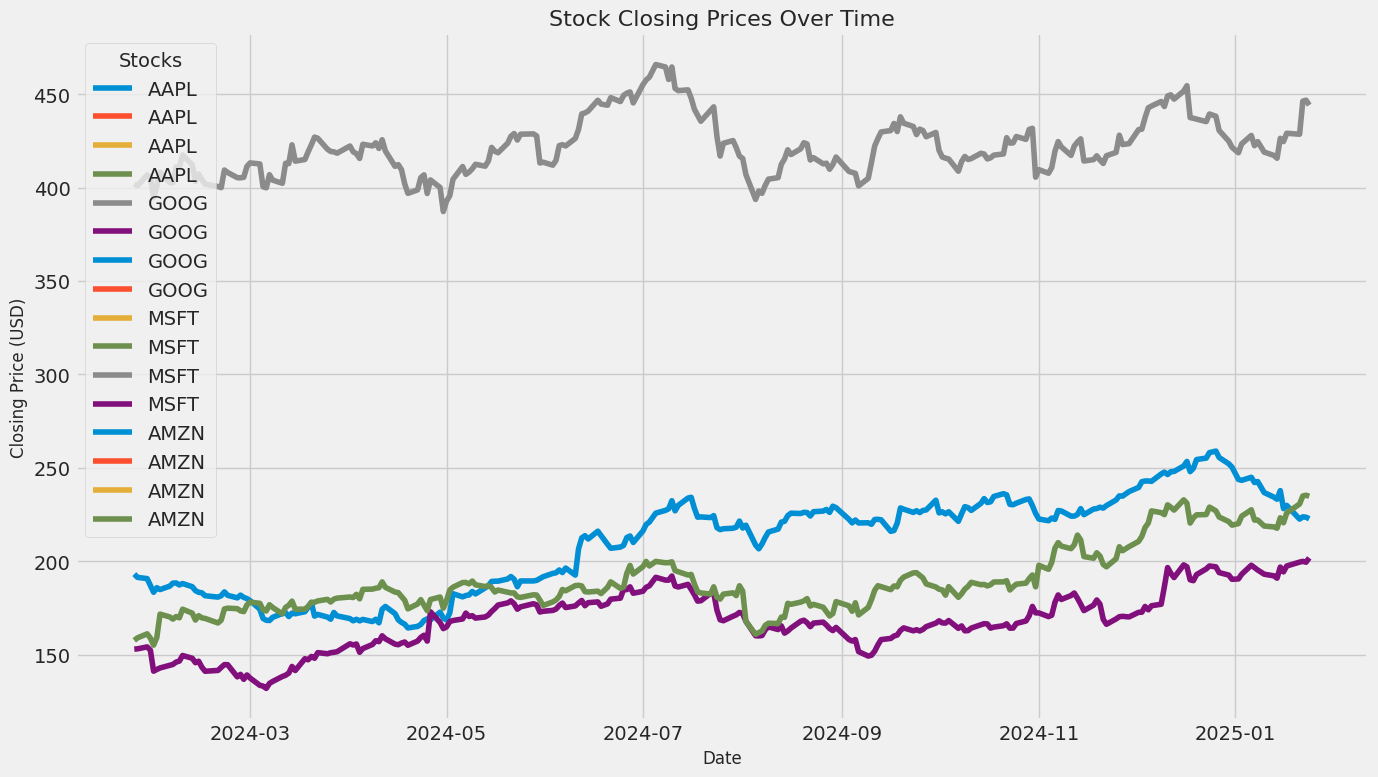

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime

# Set visualization styles
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

# Define the list of stocks and their names
stocks = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
company_names = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON']

# Define the date range
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Initialize an empty list to store stock data
stock_data_list = []

# Fetch data for each stock
for stock, name in zip(stocks, company_names):
    print(f"Fetching data for {name} ({stock})...")
    stock_data = yf.download(stock, start=start, end=end, interval="1d")
    stock_data = stock_data[['Open', 'High', 'Low', 'Close', 'Volume']]  # Select specific columns
    stock_data.dropna(inplace=True)  # Drop rows with NaN values
    stock_data['Ticker'] = stock  # Add stock ticker
    stock_data['Company'] = name  # Add company name
    stock_data_list.append(stock_data)

# Concatenate all stock data into a single DataFrame
df = pd.concat(stock_data_list, axis=0)
df.reset_index(inplace=True)

# Display the last 10 rows of the cleaned data
print("\nCleaned Stock Data:")
print(df.tail(10))

# Save to CSV
df.to_csv("cleaned_stock_data.csv", index=False)
print("\nData saved to 'cleaned_stock_data.csv'.")

# Visualization: Closing Prices
plt.figure(figsize=(14, 8))
for stock in stocks:
    stock_df = df[df['Ticker'] == stock]
    plt.plot(stock_df['Date'], stock_df['Close'], label=stock)

plt.title("Stock Closing Prices Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Closing Price (USD)", fontsize=12)
plt.legend(title="Stocks")
plt.tight_layout()
plt.show()


In [ ]:
!pip install alpha_vantage

Fetching data for APPLE (AAPL)...
Fetching data for GOOGLE (GOOG)...
Fetching data for MICROSOFT (MSFT)...
Fetching data for AMAZON (AMZN)...

Combined Stock Data:
            Date    Open    High       Low   Close      Volume Ticker  \
21761 2025-01-23  234.10  235.52  231.5100  235.42  26404364.0   AMZN   
21762 2025-01-24  445.16  446.65  441.4000  444.06  15549453.0   MSFT   
21763 2025-01-24  199.85  202.57  199.7842  201.90  12732376.0   GOOG   
21764 2025-01-24  234.50  236.40  232.9300  234.85  25890738.0   AMZN   
21765 2025-01-24  224.78  225.63  221.4100  222.78  54697907.0   AAPL   

         Company  
21761     AMAZON  
21762  MICROSOFT  
21763     GOOGLE  
21764     AMAZON  
21765      APPLE  

Data saved to 'alpha_vantage_stock_data.csv'.


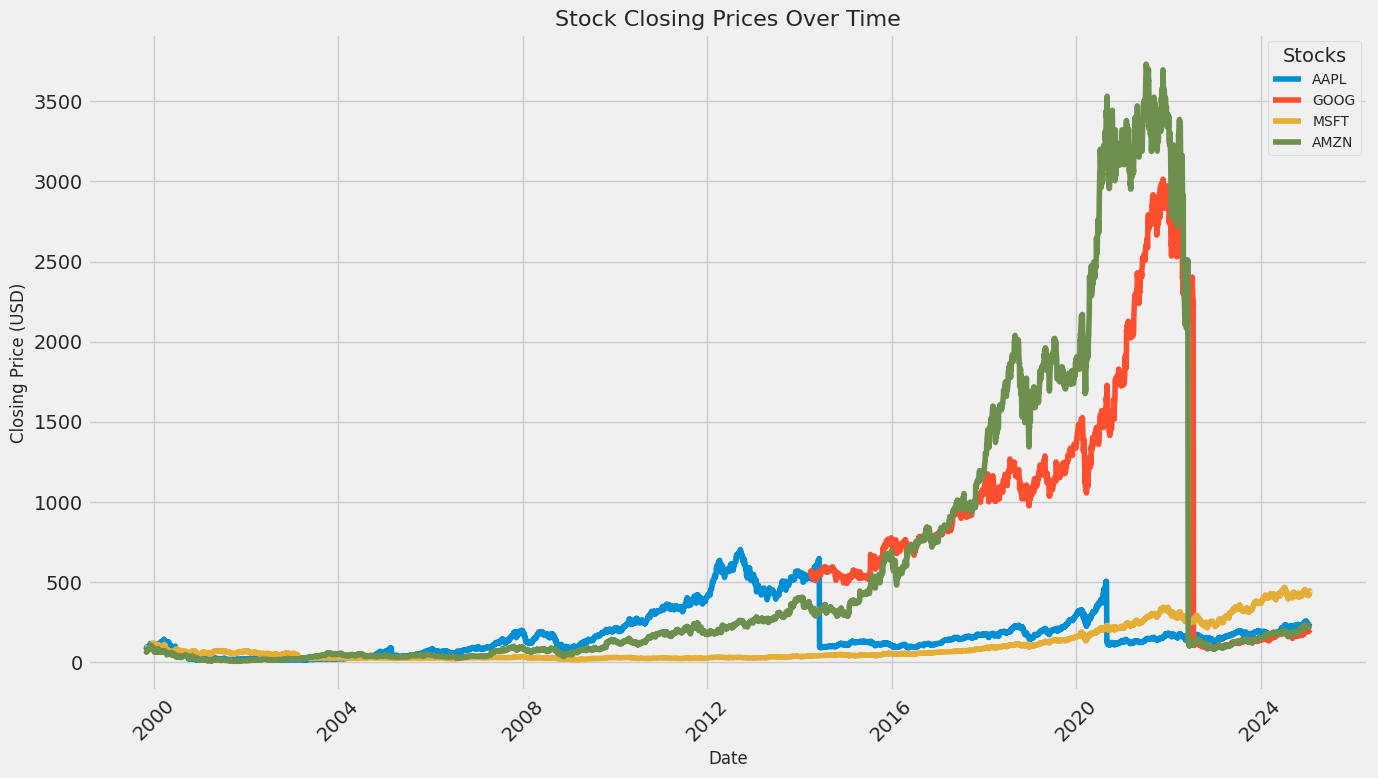

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from alpha_vantage.timeseries import TimeSeries

# Set visualization styles
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

# Alpha Vantage API key
api_key = "7RMZ8BV7DZTM36DL"

# List of tech stocks
stocks = ["AAPL", "GOOG", "MSFT", "AMZN"]
company_names = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

# Initialize Alpha Vantage TimeSeries object
ts = TimeSeries(key=api_key, output_format="pandas")

# Initialize an empty list to store data
stock_data_list = []

# Fetch and process data for each stock
for stock, name in zip(stocks, company_names):
    print(f"Fetching data for {name} ({stock})...")
    data, meta_data = ts.get_daily(symbol=stock, outputsize="full")  # Get daily stock data
    data = data[["1. open", "2. high", "3. low", "4. close", "5. volume"]]  # Select key columns
    data.columns = ["Open", "High", "Low", "Close", "Volume"]  # Rename columns
    data["Ticker"] = stock  # Add ticker column
    data["Company"] = name  # Add company name
    data.index.name = "Date"  # Rename index to Date
    data.reset_index(inplace=True)  # Reset index for better readability
    stock_data_list.append(data)

# Combine all the stock data into a single DataFrame
df = pd.concat(stock_data_list, axis=0)
df.sort_values(by="Date", inplace=True)  # Sort by date
df.reset_index(drop=True, inplace=True)  # Reset the index
print("\nCombined Stock Data:")
print(df.tail())

# Save to CSV
df.to_csv("alpha_vantage_stock_data.csv", index=False)
print("\nData saved to 'alpha_vantage_stock_data.csv'.")

# Visualization: Plot closing prices for all stocks
plt.figure(figsize=(14, 8))
for stock in stocks:
    stock_df = df[df["Ticker"] == stock]
    plt.plot(stock_df["Date"], stock_df["Close"], label=stock)

plt.title("Stock Closing Prices Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Closing Price (USD)", fontsize=12)
plt.legend(title="Stocks", fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


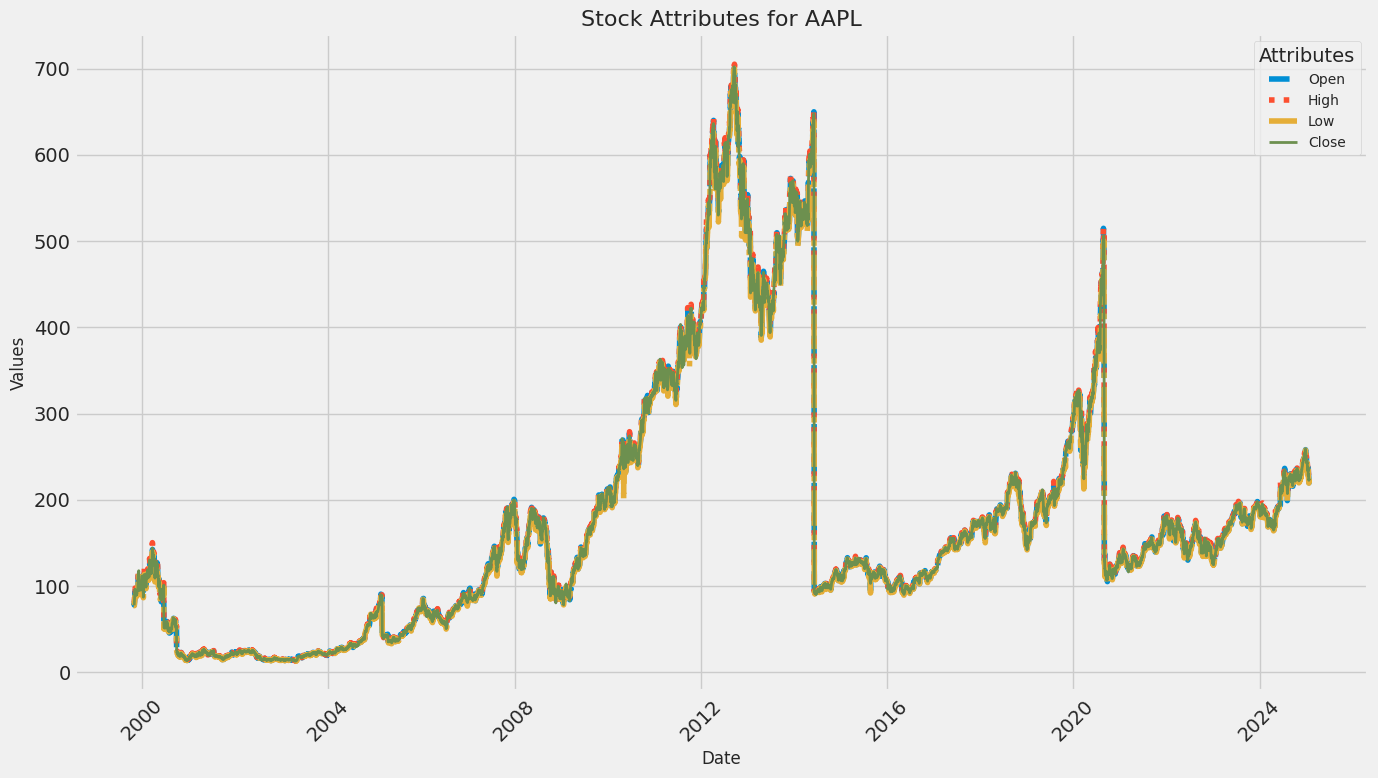

In [ ]:
def plot_stock_attributes(data, ticker):
    # Filter data for the specified ticker
    stock_data = data[data["Ticker"] == ticker]

    if stock_data.empty:
        print(f"No data found for ticker: {ticker}")
        return

    # Set up the figure and axis
    plt.figure(figsize=(14, 8))

    # Plot each attribute
    plt.plot(stock_data["Date"], stock_data["Open"], label="Open", linestyle='--')
    plt.plot(stock_data["Date"], stock_data["High"], label="High", linestyle=':')
    plt.plot(stock_data["Date"], stock_data["Low"], label="Low", linestyle='-.')
    plt.plot(stock_data["Date"], stock_data["Close"], label="Close", linewidth=2)

    # Set title and labels
    plt.title(f"Stock Attributes for {ticker}", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Values", fontsize=12)
    plt.legend(title="Attributes", fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example: Plot for a specific company ticker (e.g., "AAPL")
plot_stock_attributes(df, "AAPL")

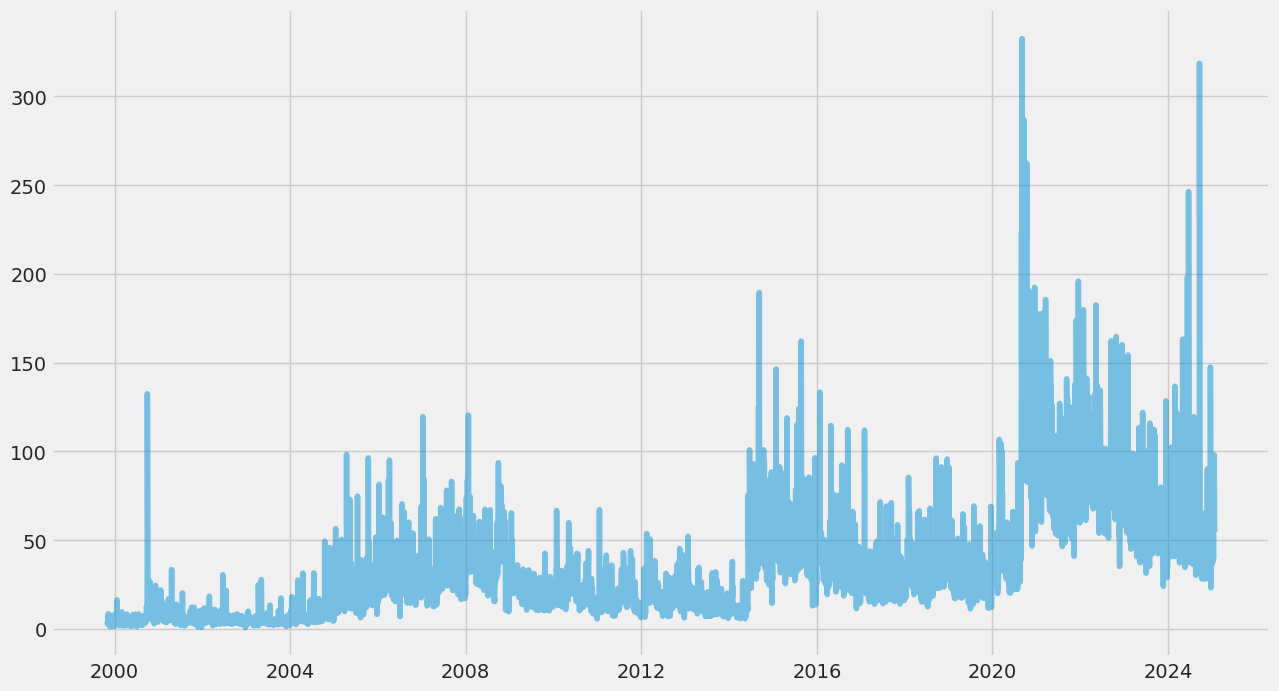

In [ ]:
def plot_stock_attributes(data, ticker):
    # Filter data for the specified ticker
    stock_data = data[data["Ticker"] == ticker]

    if stock_data.empty:
        print(f"No data found for ticker: {ticker}")
        return

    plt.figure(figsize=(14, 8))
    plt.plot(stock_data["Date"], stock_data["Volume"] / 1e6, label="Volume (in millions)", alpha=0.5)  # Scale volume

plot_stock_attributes(df, "AAPL")

In [ ]:
import numpy as np

# Create a new dataframe with only the 'Close' column
data = data[['Close']]

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * 0.95))

# Print the training data length
print(f"Training data length: {training_data_len}")


Training data length: 6030


In [ ]:
!pip install alpha_vantage

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5969/5969 ━━━━━━━━━━━━━━━━━━━━ 352s 58ms/step - loss: 0.0018
Epoch 2/5
5969/5969 ━━━━━━━━━━━━━━━━━━━━ 382s 58ms/step - loss: 5.1352e-04
Epoch 3/5
5969/5969 ━━━━━━━━━━━━━━━━━━━━ 388s 59ms/step - loss: 3.8008e-04
Epoch 4/5
5969/5969 ━━━━━━━━━━━━━━━━━━━━ 377s 59ms/step - loss: 2.8284e-04
Epoch 5/5
5969/5969 ━━━━━━━━━━━━━━━━━━━━ 381s 58ms/step - loss: 4.5669e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32

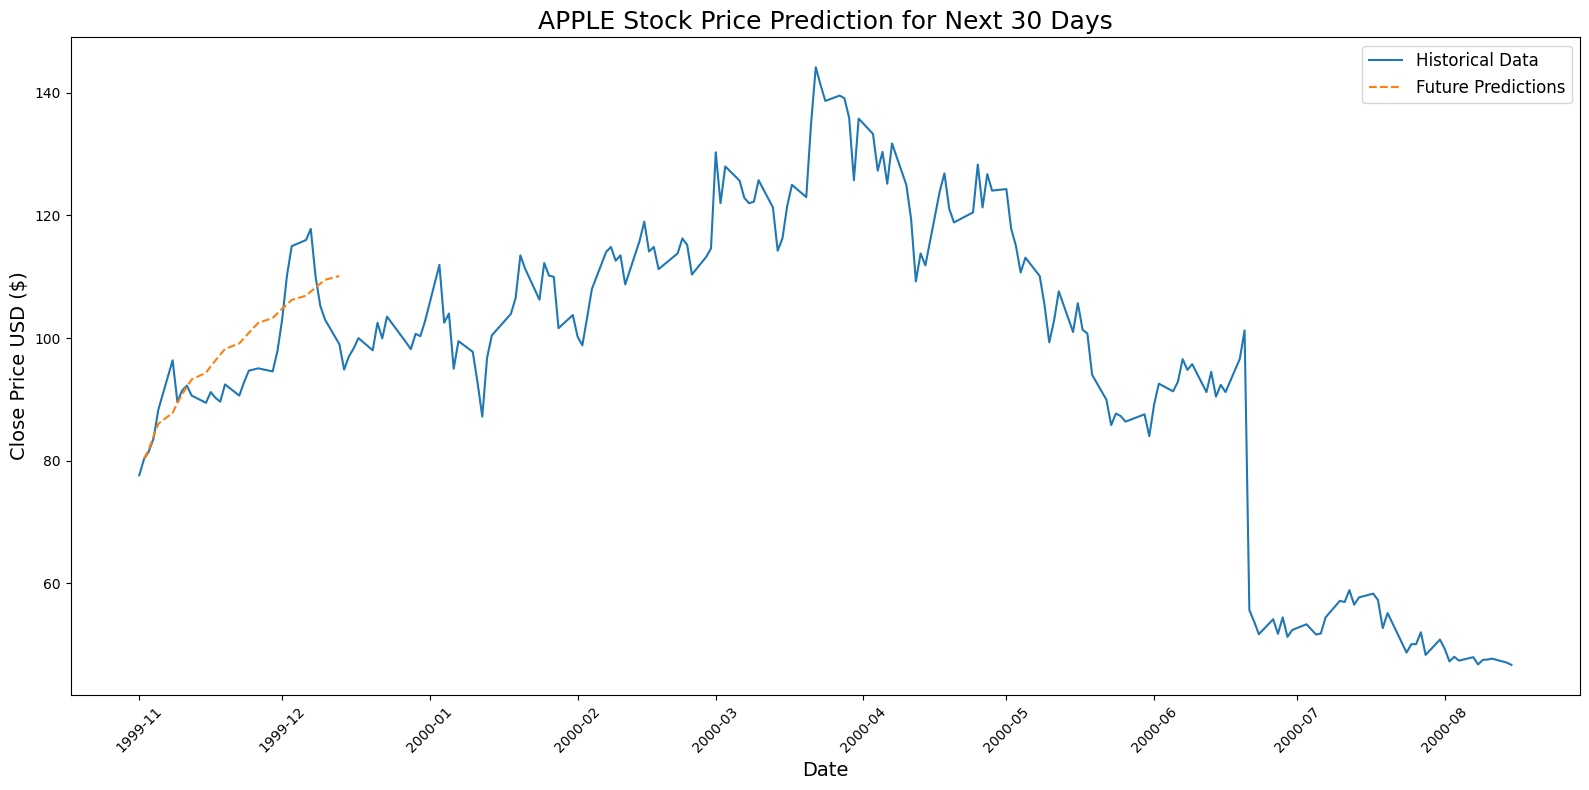

         Date  Predicted Price
0  1999-11-02        80.355042
1  1999-11-03        81.825058
2  1999-11-04        83.999939
3  1999-11-05        86.022629
4  1999-11-08        87.804428
5  1999-11-09        89.386711
6  1999-11-10        90.802460
7  1999-11-11        92.081184
8  1999-11-12        93.253075
9  1999-11-15        94.344765
10 1999-11-16        95.376701
11 1999-11-17        96.363289
12 1999-11-18        97.314095
13 1999-11-19        98.235214
14 1999-11-22        99.130394
15 1999-11-23       100.001930
16 1999-11-24       100.851151
17 1999-11-25       101.678955
18 1999-11-26       102.485947
19 1999-11-29       103.272614
20 1999-11-30       104.039406
21 1999-12-01       104.786758
22 1999-12-02       105.515137
23 1999-12-03       106.224998
24 1999-12-06       106.916824
25 1999-12-07       107.591072
26 1999-12-08       108.248207
27 1999-12-09       108.888718
28 1999-12-10       109.513046
29 1999-12-13       110.121635


In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries

# Alpha Vantage API key
api_key = "7RMZ8BV7DZTM36DL"
stock = "AAPL"
company_name = "APPLE"

# Fetch stock data from Alpha Vantage
ts = TimeSeries(key=api_key, output_format="pandas")
data, meta_data = ts.get_daily(symbol=stock, outputsize="full")

# Select 'Close' column and preprocess
data = data[['4. close']]
data.columns = ['Close']
dataset = data.values

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Prepare the training data (use 95% for training)
training_data_len = int(len(dataset) * 0.95)
train_data = scaled_data[:training_data_len, :]

x_train, y_train = [], []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)

# Use the last 60 days of data for future predictions
last_60_days = scaled_data[-60:]
future_input = np.reshape(last_60_days, (1, last_60_days.shape[0], 1))

# Predict future stock prices
future_days = 30  # Number of days to predict
future_predictions = []

for _ in range(future_days):
    pred_price = model.predict(future_input)
    future_predictions.append(pred_price[0, 0])  # Add prediction

    # Reshape the predicted price to match the 3D shape of future_input
    pred_price_reshaped = np.reshape(pred_price[0, 0], (1, 1, 1))

    # Append the predicted price to the input, removing the oldest value
    future_input = np.append(future_input[:, 1:, :], pred_price_reshaped, axis=1)

# Inverse transform predictions to get actual prices
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create a dataframe for future predictions
future_dates = pd.date_range(start=data.index[-1], periods=future_days + 1, freq='B')[1:]
future_df = pd.DataFrame({'Date': future_dates, 'Predicted Price': future_predictions.flatten()})

# Visualize the data
plt.figure(figsize=(16, 8))
plt.title(f"{company_name} Stock Price Prediction for Next {future_days} Days", fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price USD ($)', fontsize=14)

# Plot historical data
plt.plot(data.index[-200:], dataset[-200:], label="Historical Data")
# Plot future predictions
plt.plot(future_df['Date'], future_df['Predicted Price'], label="Future Predictions", linestyle='--')

plt.legend(fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the future predictions
print(future_df)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5970/5970 ━━━━━━━━━━━━━━━━━━━━ 330s 55ms/step - loss: 0.0013


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step


7.927007702653433

In [3]:
!pip install alpha_vantage

Fetching data for APPLE (AAPL)...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5970/5970 ━━━━━━━━━━━━━━━━━━━━ 374s 62ms/step - loss: 0.0014
Epoch 2/5
5970/5970 ━━━━━━━━━━━━━━━━━━━━ 375s 61ms/step - loss: 4.1894e-04
Epoch 3/5
5970/5970 ━━━━━━━━━━━━━━━━━━━━ 380s 60ms/step - loss: 5.6281e-04
Epoch 4/5
5970/5970 ━━━━━━━━━━━━━━━━━━━━ 370s 62ms/step - loss: 2.6812e-04
Epoch 5/5
5970/5970 ━━━━━━━━━━━━━━━━━━━━ 398s 65ms/step - loss: 4.6385e-04
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step
RMSE: 5.402655304161319


<ipython-input-4-391fd838e5ca>:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


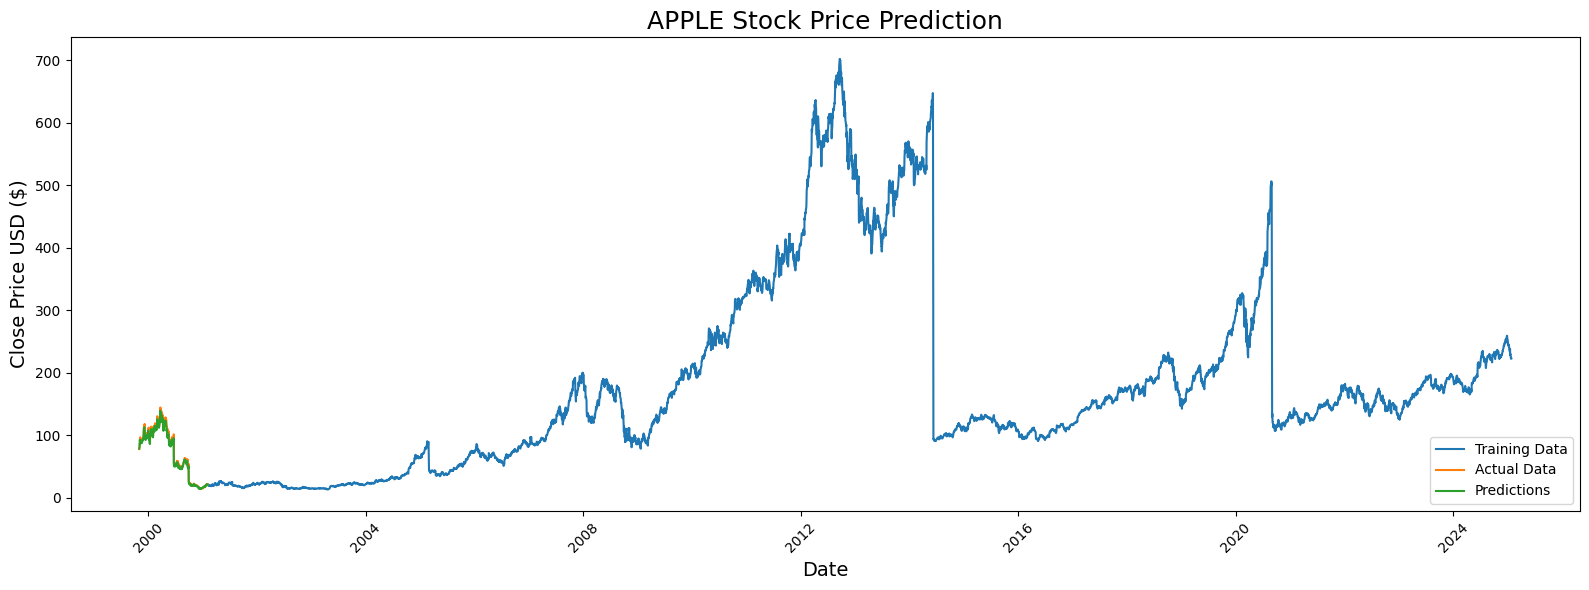

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries

# Alpha Vantage API key
api_key = "7RMZ8BV7DZTM36DL"
stock = "AAPL"
company_name = "APPLE"

# Initialize Alpha Vantage TimeSeries object
ts = TimeSeries(key=api_key, output_format="pandas")

# Fetch stock data from Alpha Vantage
print(f"Fetching data for {company_name} ({stock})...")
data, meta_data = ts.get_daily(symbol=stock, outputsize="full")  # Get daily stock data

# Select the 'Close' column
data = data[['4. close']]  # Adjusting based on the Alpha Vantage data format

# Rename the '4. close' column to 'Close'
data.columns = ['Close']

# Convert the dataframe to a numpy array
dataset = data.values

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)  # Only fit on training data

# Get the number of rows for the training data
training_data_len = int(np.ceil(len(dataset) * 0.95))

# Create the training and test datasets
train_data = scaled_data[:training_data_len, :]
test_data = scaled_data[training_data_len - 60:, :]

# Create x_train and y_train
x_train, y_train = [], []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Create x_test and y_test
x_test, y_test = [], dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=5)  # Adjust epochs as needed

# Make predictions on the test set
predictions = model.predict(x_test)

# Inverse transform the predictions
predictions = scaler.inverse_transform(predictions)

# Calculate RMSE
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(f"RMSE: {rmse}")

# Prepare the train and valid dataframes for plotting
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Plot the data with proper date labels
plt.figure(figsize=(16, 6))
plt.title(f'{company_name} Stock Price Prediction', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price USD ($)', fontsize=14)
plt.plot(train.index, train['Close'], label="Training Data")
plt.plot(valid.index, valid['Close'], label="Actual Data")
plt.plot(valid.index, valid['Predictions'], label="Predictions")
plt.legend(loc='lower right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━

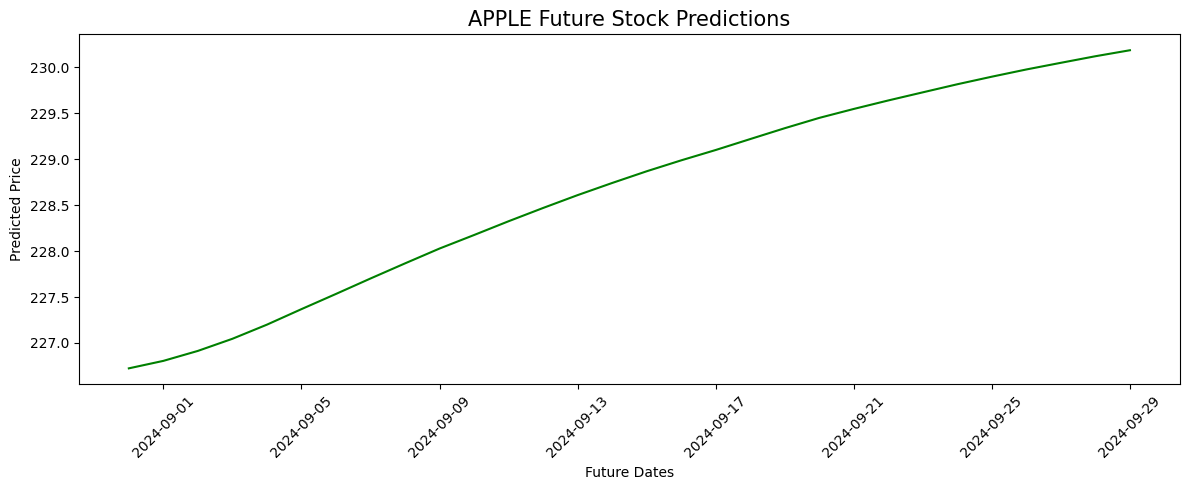

         Date  Predicted Price
0  2024-08-31       226.724014
1  2024-09-01       226.805374
2  2024-09-02       226.913895
3  2024-09-03       227.045807
4  2024-09-04       227.199600
5  2024-09-05       227.368530
6  2024-09-06       227.534027
7  2024-09-07       227.702042
8  2024-09-08       227.866547
9  2024-09-09       228.028183
10 2024-09-10       228.175339
11 2024-09-11       228.325348
12 2024-09-12       228.469803
13 2024-09-13       228.609680
14 2024-09-14       228.741821
15 2024-09-15       228.869232
16 2024-09-16       228.988220
17 2024-09-17       229.100861
18 2024-09-18       229.219955
19 2024-09-19       229.338165
20 2024-09-20       229.450485
21 2024-09-21       229.547882
22 2024-09-22       229.640381
23 2024-09-23       229.728760
24 2024-09-24       229.816666
25 2024-09-25       229.899094
26 2024-09-26       229.977661
27 2024-09-27       230.050232
28 2024-09-28       230.121704
29 2024-09-29       230.186951


In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
import datetime

# Setup
api_key = "7RMZ8BV7DZTM36DL"
stock = "AAPL"
company_name = "APPLE"

# Fetch latest data
ts = TimeSeries(key=api_key, output_format="pandas")
data, _ = ts.get_daily(symbol=stock, outputsize="compact")
data = data[['4. close']]
data.columns = ['Close']
data.index = pd.to_datetime(data.index)
dataset = data.values

# Prepare data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Quick model
model = Sequential([
    LSTM(50, input_shape=(30, 1)),
    Dense(25),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Prepare training data
x_train, y_train = [], []
for i in range(30, len(scaled_data)):
    x_train.append(scaled_data[i-30:i, 0])
    y_train.append(scaled_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))

# Quick training
model.fit(x_train, y_train, epochs=3, batch_size=32, verbose=0)

# Future prediction
def predict_future(model, last_data, scaler, days=30):
    current_batch = last_data[-30:]
    predictions = []

    for _ in range(days):
        current_batch_reshaped = current_batch.reshape((1, 30, 1))
        next_pred = model.predict(current_batch_reshaped)[0]
        predictions.append(next_pred)
        current_batch = np.append(current_batch[1:], next_pred)

    return scaler.inverse_transform(np.array(predictions))

# Generate future predictions
last_30_days = scaled_data[-30:]
future_predictions = predict_future(model, last_30_days, scaler)

# Create future dates
last_date = data.index[-1]
future_dates = pd.date_range(start=last_date + datetime.timedelta(days=1), periods=30)

# Plot future predictions
plt.figure(figsize=(12, 5))
plt.title(f'{company_name} Future Stock Predictions', fontsize=15)
plt.plot(future_dates, future_predictions, color='green')
plt.xlabel('Future Dates')
plt.ylabel('Predicted Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print future predictions
prediction_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted Price': future_predictions.flatten()
})
print(prediction_df)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━

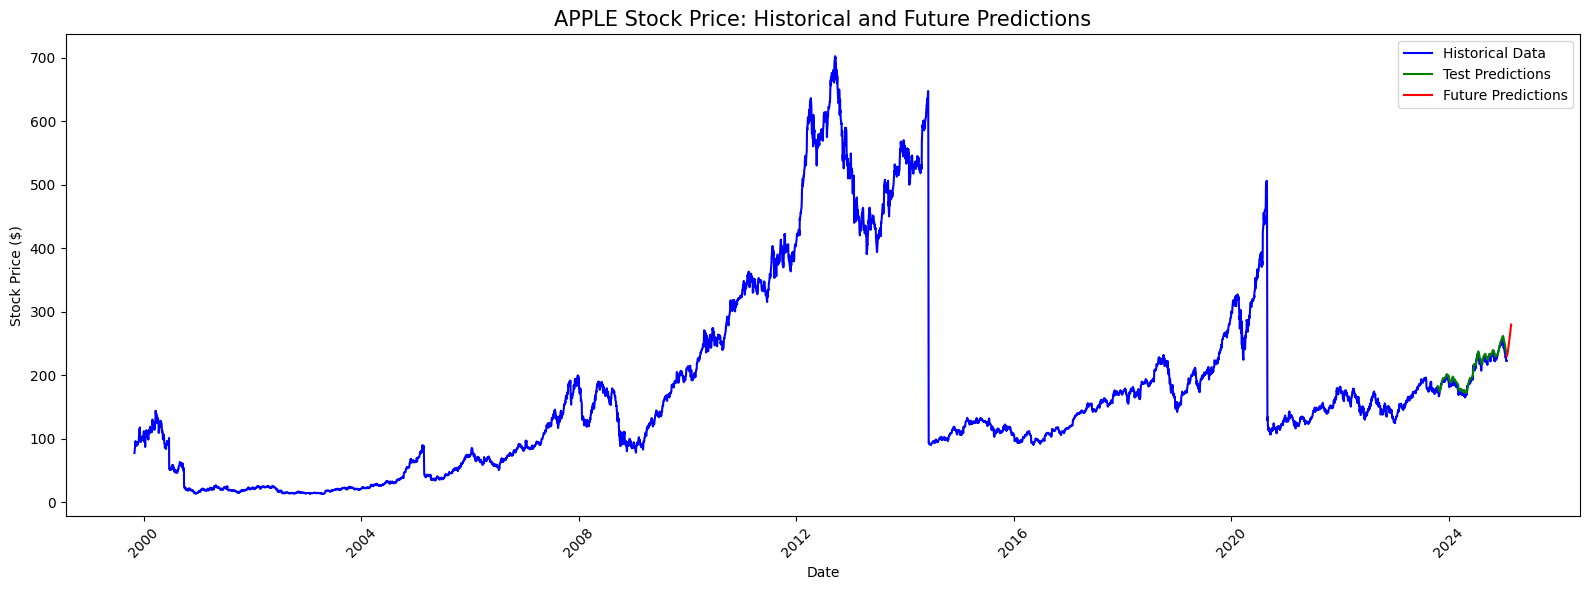

Test Predictions:
          Date  Test Predicted Price
0   2023-10-19            182.838455
1   2023-10-20            182.233292
2   2023-10-23            181.124893
3   2023-10-24            180.164444
4   2023-10-25            179.450470
..         ...                   ...
312 2025-01-17            240.314957
313 2025-01-21            238.557861
314 2025-01-22            235.598129
315 2025-01-23            233.402924
316 2025-01-24            231.648544

[317 rows x 2 columns]

Future Predictions:
         Date  Future Predicted Price
0  2025-01-25              230.144882
1  2025-01-26              230.643204
2  2025-01-27              231.444595
3  2025-01-28              232.485855
4  2025-01-29              233.707230
5  2025-01-30              235.065613
6  2025-01-31              236.530212
7  2025-02-01              238.078827
8  2025-02-02              239.694397
9  2025-02-03              241.364136
10 2025-02-04              243.078751
11 2025-02-05              244.830887

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
import datetime

# Setup
api_key = "7RMZ8BV7DZTM36DL"
stock = "AAPL"
company_name = "APPLE"

# Fetch data
ts = TimeSeries(key=api_key, output_format="pandas")
data, _ = ts.get_daily(symbol=stock, outputsize="full")
data = data[['4. close']]
data.columns = ['Close']
data.index = pd.to_datetime(data.index)
data = data.sort_index()
dataset = data.values

# Prepare data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Split data
training_data_len = int(np.ceil(len(dataset) * 0.95))
train_data = scaled_data[:training_data_len, :]

# Prepare training data
x_train, y_train = [], []
for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))

# Create model
model = Sequential([
    LSTM(50, input_shape=(30, 1)),
    Dense(25),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(x_train, y_train, epochs=3, batch_size=32, verbose=0)

# Prediction function
def predict_future(model, last_data, scaler, days=30):
    current_batch = last_data[-30:]
    predictions = []

    for _ in range(days):
        current_batch_reshaped = current_batch.reshape((1, 30, 1))
        next_pred = model.predict(current_batch_reshaped)[0]
        predictions.append(next_pred)
        current_batch = np.append(current_batch[1:], next_pred)

    return scaler.inverse_transform(np.array(predictions))

# Generate future predictions
last_30_days = scaled_data[-30:]
future_predictions = predict_future(model, last_30_days, scaler)

# Create future dates
last_date = data.index[-1]
future_dates = pd.date_range(start=last_date + datetime.timedelta(days=1), periods=30)

# Plotting
plt.figure(figsize=(16, 6))
plt.title(f'{company_name} Stock Price: Historical and Future Predictions', fontsize=15)

# Plot historical data
plt.plot(data.index, data['Close'], label='Historical Data', color='blue')

# Predict and plot test data
test_data = scaled_data[training_data_len - 30:, :]
x_test = []
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])
x_test = np.array(x_test)
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

test_predictions = model.predict(x_test)
test_predictions = scaler.inverse_transform(test_predictions)

# Plot test predictions
test_dates = data.index[training_data_len:training_data_len+len(test_predictions)]
plt.plot(test_dates, test_predictions, label='Test Predictions', color='green')

# Plot future predictions
plt.plot(future_dates, future_predictions, label='Future Predictions', color='red')

plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print test and future predictions
test_prediction_df = pd.DataFrame({
    'Date': test_dates,
    'Test Predicted Price': test_predictions.flatten()
})
future_prediction_df = pd.DataFrame({
    'Date': future_dates,
    'Future Predicted Price': future_predictions.flatten()
})

print("Test Predictions:")
print(test_prediction_df)
print("\nFuture Predictions:")
print(future_prediction_df)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━

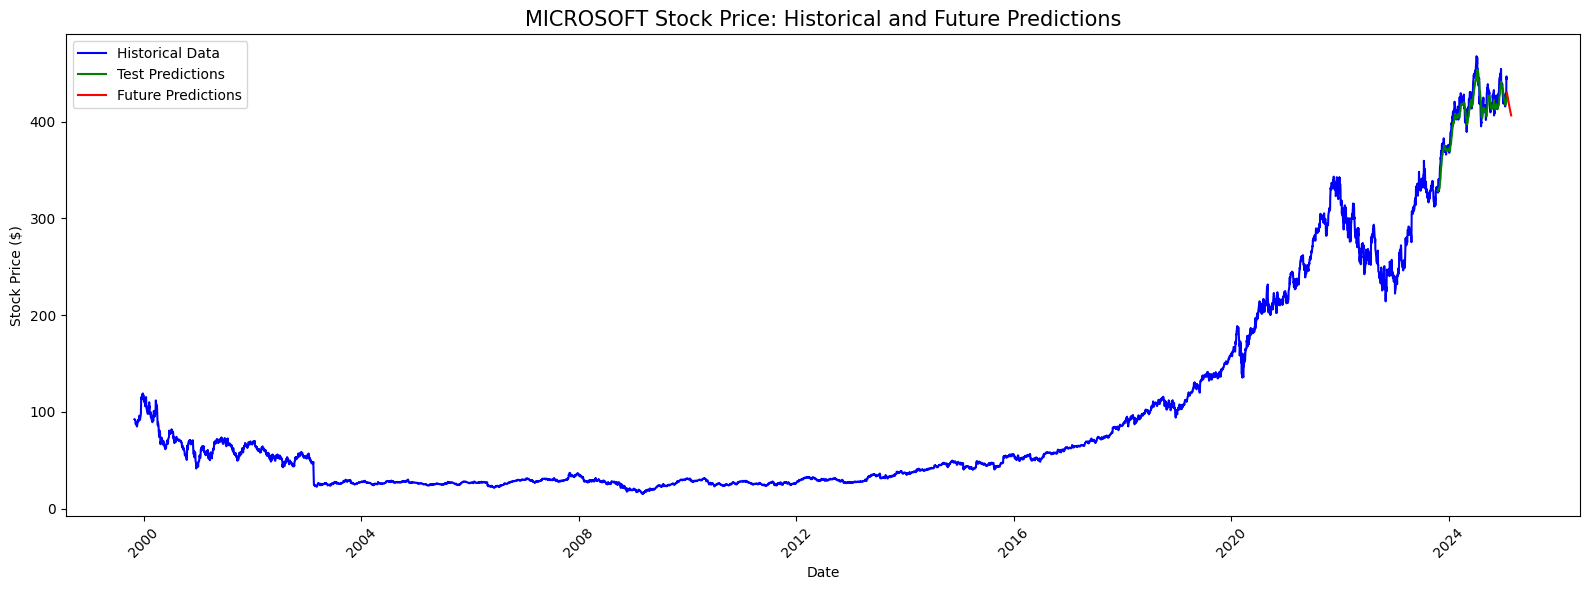

Test Predictions:
          Date  Test Predicted Price
0   2023-10-19            328.756042
1   2023-10-20            329.240326
2   2023-10-23            328.755920
3   2023-10-24            328.816742
4   2023-10-25            329.085754
..         ...                   ...
312 2025-01-17            418.448456
313 2025-01-21            419.546387
314 2025-01-22            420.394470
315 2025-01-23            424.252472
316 2025-01-24            427.603851

[317 rows x 2 columns]

Future Predictions:
         Date  Future Predicted Price
0  2025-01-25              429.904083
1  2025-01-26              429.255859
2  2025-01-27              428.501923
3  2025-01-28              427.693939
4  2025-01-29              426.850464
5  2025-01-30              425.984558
6  2025-01-31              425.105652
7  2025-02-01              424.218994
8  2025-02-02              423.330505
9  2025-02-03              422.443878
10 2025-02-04              421.561523
11 2025-02-05              420.685669

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
import datetime

# Setup for Microsoft (MSFT)
api_key = "7RMZ8BV7DZTM36DL"
stock = "MSFT"
company_name = "MICROSOFT"

# Fetch data
ts = TimeSeries(key=api_key, output_format="pandas")
data, _ = ts.get_daily(symbol=stock, outputsize="full")
data = data[['4. close']]
data.columns = ['Close']
data.index = pd.to_datetime(data.index)
data = data.sort_index()
dataset = data.values

# Prepare data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Split data
training_data_len = int(np.ceil(len(dataset) * 0.95))
train_data = scaled_data[:training_data_len, :]

# Prepare training data
x_train, y_train = [], []
for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))

# Create model (same as previous script)
model = Sequential([
    LSTM(50, input_shape=(30, 1)),
    Dense(25),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(x_train, y_train, epochs=3, batch_size=32, verbose=0)

# Prediction function
def predict_future(model, last_data, scaler, days=30):
    current_batch = last_data[-30:]
    predictions = []

    for _ in range(days):
        current_batch_reshaped = current_batch.reshape((1, 30, 1))
        next_pred = model.predict(current_batch_reshaped)[0]
        predictions.append(next_pred)
        current_batch = np.append(current_batch[1:], next_pred)

    return scaler.inverse_transform(np.array(predictions))

# Generate future predictions
last_30_days = scaled_data[-30:]
future_predictions = predict_future(model, last_30_days, scaler)

# Create future dates
last_date = data.index[-1]
future_dates = pd.date_range(start=last_date + datetime.timedelta(days=1), periods=30)

# Plotting
plt.figure(figsize=(16, 6))
plt.title(f'{company_name} Stock Price: Historical and Future Predictions', fontsize=15)

# Plot historical data
plt.plot(data.index, data['Close'], label='Historical Data', color='blue')

# Predict and plot test data
test_data = scaled_data[training_data_len - 30:, :]
x_test = []
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])
x_test = np.array(x_test)
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

test_predictions = model.predict(x_test)
test_predictions = scaler.inverse_transform(test_predictions)

# Plot test predictions
test_dates = data.index[training_data_len:training_data_len+len(test_predictions)]
plt.plot(test_dates, test_predictions, label='Test Predictions', color='green')

# Plot future predictions
plt.plot(future_dates, future_predictions, label='Future Predictions', color='red')

plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print test and future predictions
test_prediction_df = pd.DataFrame({
    'Date': test_dates,
    'Test Predicted Price': test_predictions.flatten()
})
future_prediction_df = pd.DataFrame({
    'Date': future_dates,
    'Future Predicted Price': future_predictions.flatten()
})

print("Test Predictions:")
print(test_prediction_df)
print("\nFuture Predictions:")
print(future_prediction_df)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━

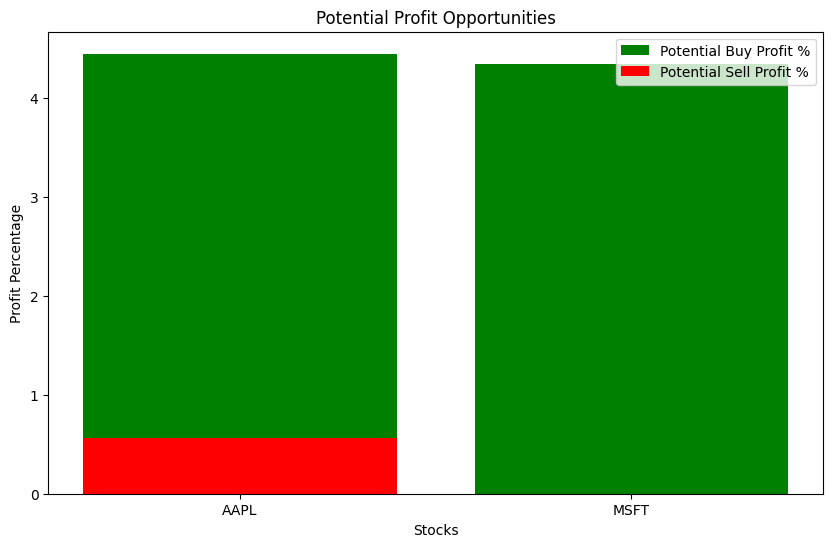

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
import datetime

# Setup for stocks
stocks = ["AAPL", "MSFT"]
api_key = "7RMZ8BV7DZTM36DL"

# Profit analysis function
def analyze_stock_profit(stock):
    # Fetch data
    ts = TimeSeries(key=api_key, output_format="pandas")
    data, _ = ts.get_daily(symbol=stock, outputsize="full")
    data = data[['4. close']]
    data.columns = ['Close']
    data.index = pd.to_datetime(data.index)
    data = data.sort_index()
    dataset = data.values

    # Prepare data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)

    # Split data
    training_data_len = int(np.ceil(len(dataset) * 0.95))
    train_data = scaled_data[:training_data_len, :]

    # Prepare training data
    x_train, y_train = [], []
    for i in range(30, len(train_data)):
        x_train.append(train_data[i-30:i, 0])
        y_train.append(train_data[i, 0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))

    # Create and train model
    model = Sequential([
        LSTM(50, input_shape=(30, 1)),
        Dense(25),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, epochs=3, batch_size=32, verbose=0)

    # Predict future prices
    def predict_future(model, last_data, scaler, days=30):
        current_batch = last_data[-30:]
        predictions = []

        for _ in range(days):
            current_batch_reshaped = current_batch.reshape((1, 30, 1))
            next_pred = model.predict(current_batch_reshaped)[0]
            predictions.append(next_pred)
            current_batch = np.append(current_batch[1:], next_pred)

        return scaler.inverse_transform(np.array(predictions))

    # Generate predictions
    last_30_days = scaled_data[-30:]
    future_predictions = predict_future(model, last_30_days, scaler)

    # Profit analysis
    current_price = data['Close'].iloc[-1]
    predicted_prices = future_predictions.flatten()

    # Investment strategy analysis
    buy_points = predicted_prices[predicted_prices < current_price]
    sell_points = predicted_prices[predicted_prices > current_price]

    potential_buy_profit = (current_price - buy_points.min()) / current_price * 100 if len(buy_points) > 0 else 0
    potential_sell_profit = (sell_points.max() - current_price) / current_price * 100 if len(sell_points) > 0 else 0

    return {
        'Stock': stock,
        'Current Price': current_price,
        'Predicted Lowest Price': buy_points.min() if len(buy_points) > 0 else None,
        'Predicted Highest Price': sell_points.max() if len(sell_points) > 0 else None,
        'Potential Buy Profit %': round(potential_buy_profit, 2),
        'Potential Sell Profit %': round(potential_sell_profit, 2)
    }

# Analyze multiple stocks
results = []
for stock in stocks:
    results.append(analyze_stock_profit(stock))

# Display results
results_df = pd.DataFrame(results)
print(results_df)

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(results_df['Stock'], results_df['Potential Buy Profit %'], label='Potential Buy Profit %', color='green')
plt.bar(results_df['Stock'], results_df['Potential Sell Profit %'], label='Potential Sell Profit %', color='red')
plt.title('Potential Profit Opportunities')
plt.xlabel('Stocks')
plt.ylabel('Profit Percentage')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
  Stock    MAE     MSE   RMSE  R2 Score  Mean Percentage Error
0  AAPL   8.65   94.34   9.71    0.8497                   4.28
1  MSFT  15.84  315.86  17.77    0.5690                   3.83


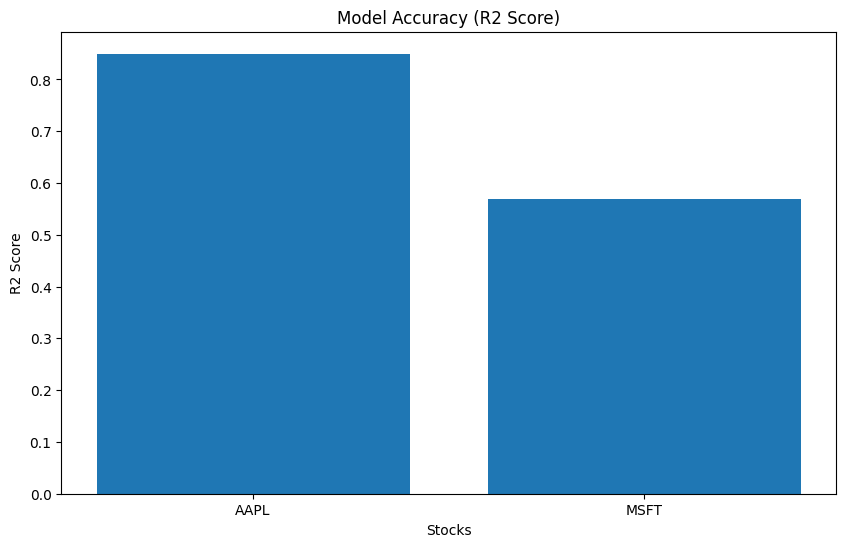

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries

def evaluate_stock_prediction(stock):
    # Fetch data
    ts = TimeSeries(key="7RMZ8BV7DZTM36DL", output_format="pandas")
    data, _ = ts.get_daily(symbol=stock, outputsize="full")
    data = data[['4. close']]
    data.columns = ['Close']
    data.index = pd.to_datetime(data.index)
    data = data.sort_index()
    dataset = data.values

    # Prepare data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)

    # Split data
    training_data_len = int(np.ceil(len(dataset) * 0.95))
    train_data = scaled_data[:training_data_len, :]
    test_data = scaled_data[training_data_len - 30:, :]

    # Prepare training data
    x_train, y_train = [], []
    for i in range(30, len(train_data)):
        x_train.append(train_data[i-30:i, 0])
        y_train.append(train_data[i, 0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))

    # Prepare test data
    x_test = []
    for i in range(30, len(test_data)):
        x_test.append(test_data[i-30:i, 0])
    x_test = np.array(x_test)
    x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

    # Create and train model
    model = Sequential([
        LSTM(50, input_shape=(30, 1)),
        Dense(25),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, epochs=3, batch_size=32, verbose=0)

    # Predict
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)

    # Actual values
    actual = scaler.inverse_transform(test_data[30:, :])

    # Calculate accuracy metrics
    mae = mean_absolute_error(actual, predictions)
    mse = mean_squared_error(actual, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual, predictions)

    # Percentage accuracy
    percentage_errors = np.abs((actual - predictions) / actual) * 100
    mean_percentage_error = np.mean(percentage_errors)

    return {
        'Stock': stock,
        'MAE': round(mae, 2),
        'MSE': round(mse, 2),
        'RMSE': round(rmse, 2),
        'R2 Score': round(r2, 4),
        'Mean Percentage Error': round(mean_percentage_error, 2)
    }

# Evaluate multiple stocks
stocks = ["AAPL", "MSFT"]
accuracy_results = []
for stock in stocks:
    accuracy_results.append(evaluate_stock_prediction(stock))

# Display results
accuracy_df = pd.DataFrame(accuracy_results)
print(accuracy_df)

# Visualization of accuracy
plt.figure(figsize=(10, 6))
plt.bar(accuracy_df['Stock'], accuracy_df['R2 Score'])
plt.title('Model Accuracy (R2 Score)')
plt.xlabel('Stocks')
plt.ylabel('R2 Score')
plt.show()